## Boston Housing Dataset


### Data Description and initial analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
from pandas import read_csv
data = read_csv('HousingData.csv')

In [3]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


The Boston Housing Dataset is derived from information collected by the U.S. Census Service concerning housing in the area of Boston, MA. The dataset consists of the following columns:

| Column   | Description                                                |
|----------|------------------------------------------------------------|
| CRIM     | Per capita crime rate by town                              |
| ZN       | Proportion of residential land zoned for lots over 25,000 sq.ft. |
| INDUS    | Proportion of non-retail business acres per town           |
| CHAS     | Charles River dummy variable (1 if tract bounds river; 0 otherwise) |
| NOX      | Nitric oxides concentration (parts per 10 million)        |
| RM       | Average number of rooms per dwelling                       |
| AGE      | Proportion of owner-occupied units built prior to 1940     |
| DIS      | Weighted distances to five Boston employment centres      |
| RAD      | Index of accessibility to radial highways                  |
| TAX      | Full-value property-tax rate per ten thousand dollars|
| PTRATIO  | Pupil-teacher ratio by town                                |
| B        | \(1000(B_k - 0.63)^2\), where \(B_k\) is the proportion of blacks by town |
| LSTAT    | Percentage of the population classified as % lower status |
| MEDV     | Median value of owner-occupied homes in ten thousand dollars |

In [4]:
#checking the dimension of dataset
print(np.shape(data))

(506, 14)


### Data Pre-Processing

In [5]:
#summarize the data
print(data.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  486.000000  486.000000  486.000000  486.000000  506.000000  506.000000   
mean     3.611874   11.211934   11.083992    0.069959    0.554695    6.284634   
std      8.720192   23.388876    6.835896    0.255340    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.081900    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.253715    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.560263   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  486.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.518519    3.795043    9.549407  408.237154   18.455534  356.674032   
std     27.999513    2.1057

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


As observed, several columns, including **CRIM, ZN, INDUS, CHAS, AGE and LSTAT** contain null values. To address this, we will replace these null values with the respective mean values of each column.

In [7]:
#Fill null values with average of each column
data["CRIM"].fillna(data["CRIM"].mean(),inplace=True)
data["ZN"].fillna(data["ZN"].mean(),inplace=True)
data["INDUS"].fillna(data["INDUS"].mean(),inplace=True)
data["CHAS"].fillna(data["CHAS"].mean(),inplace=True)
data["AGE"].fillna(data["AGE"].mean(),inplace=True)
data["LSTAT"].fillna(data["LSTAT"].mean(),inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


As we can see no null values we would now proceed further for visualizationa and modelling

### EDA

In [8]:
plt.style.use("Solarize_Light2")

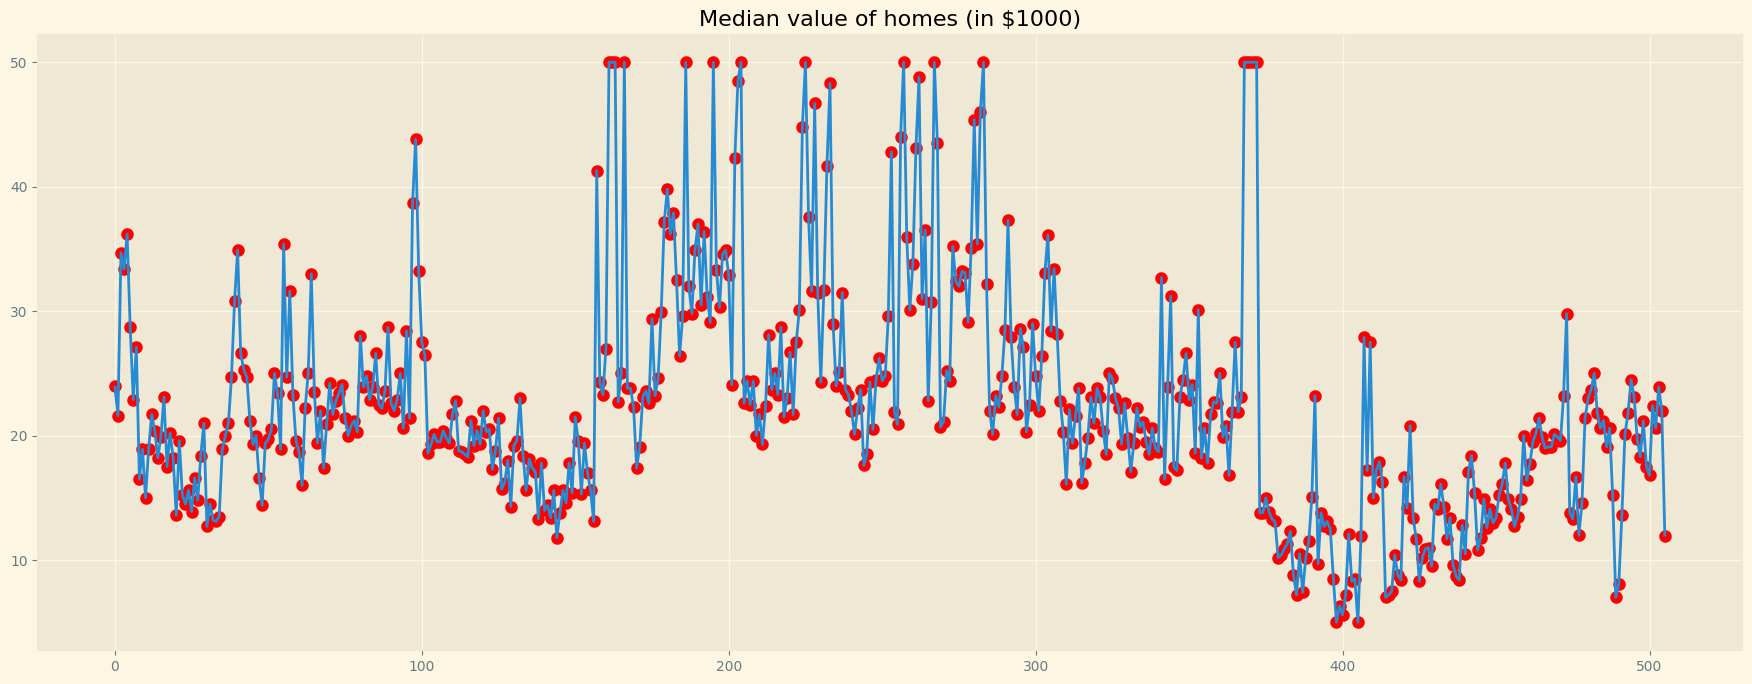

In [9]:
plt.figure(figsize=(22,8))
plt.scatter(data.index,data["MEDV"],color="red",lw=3)
plt.plot(data.index,data["MEDV"])
plt.title("Median value of homes (in $1000)")
plt.grid(True)
plt.show()

In [10]:
import warnings

warnings.filterwarnings("ignore", category=UserWarning, module="seaborn")

In the dataset, the values are widely distributed, lacking a clear pattern. The majority falls within the range of \\$20,000 to \\$25,000. The maximum house value is \\$50,000, while the minimum is approximately \\$5,000.

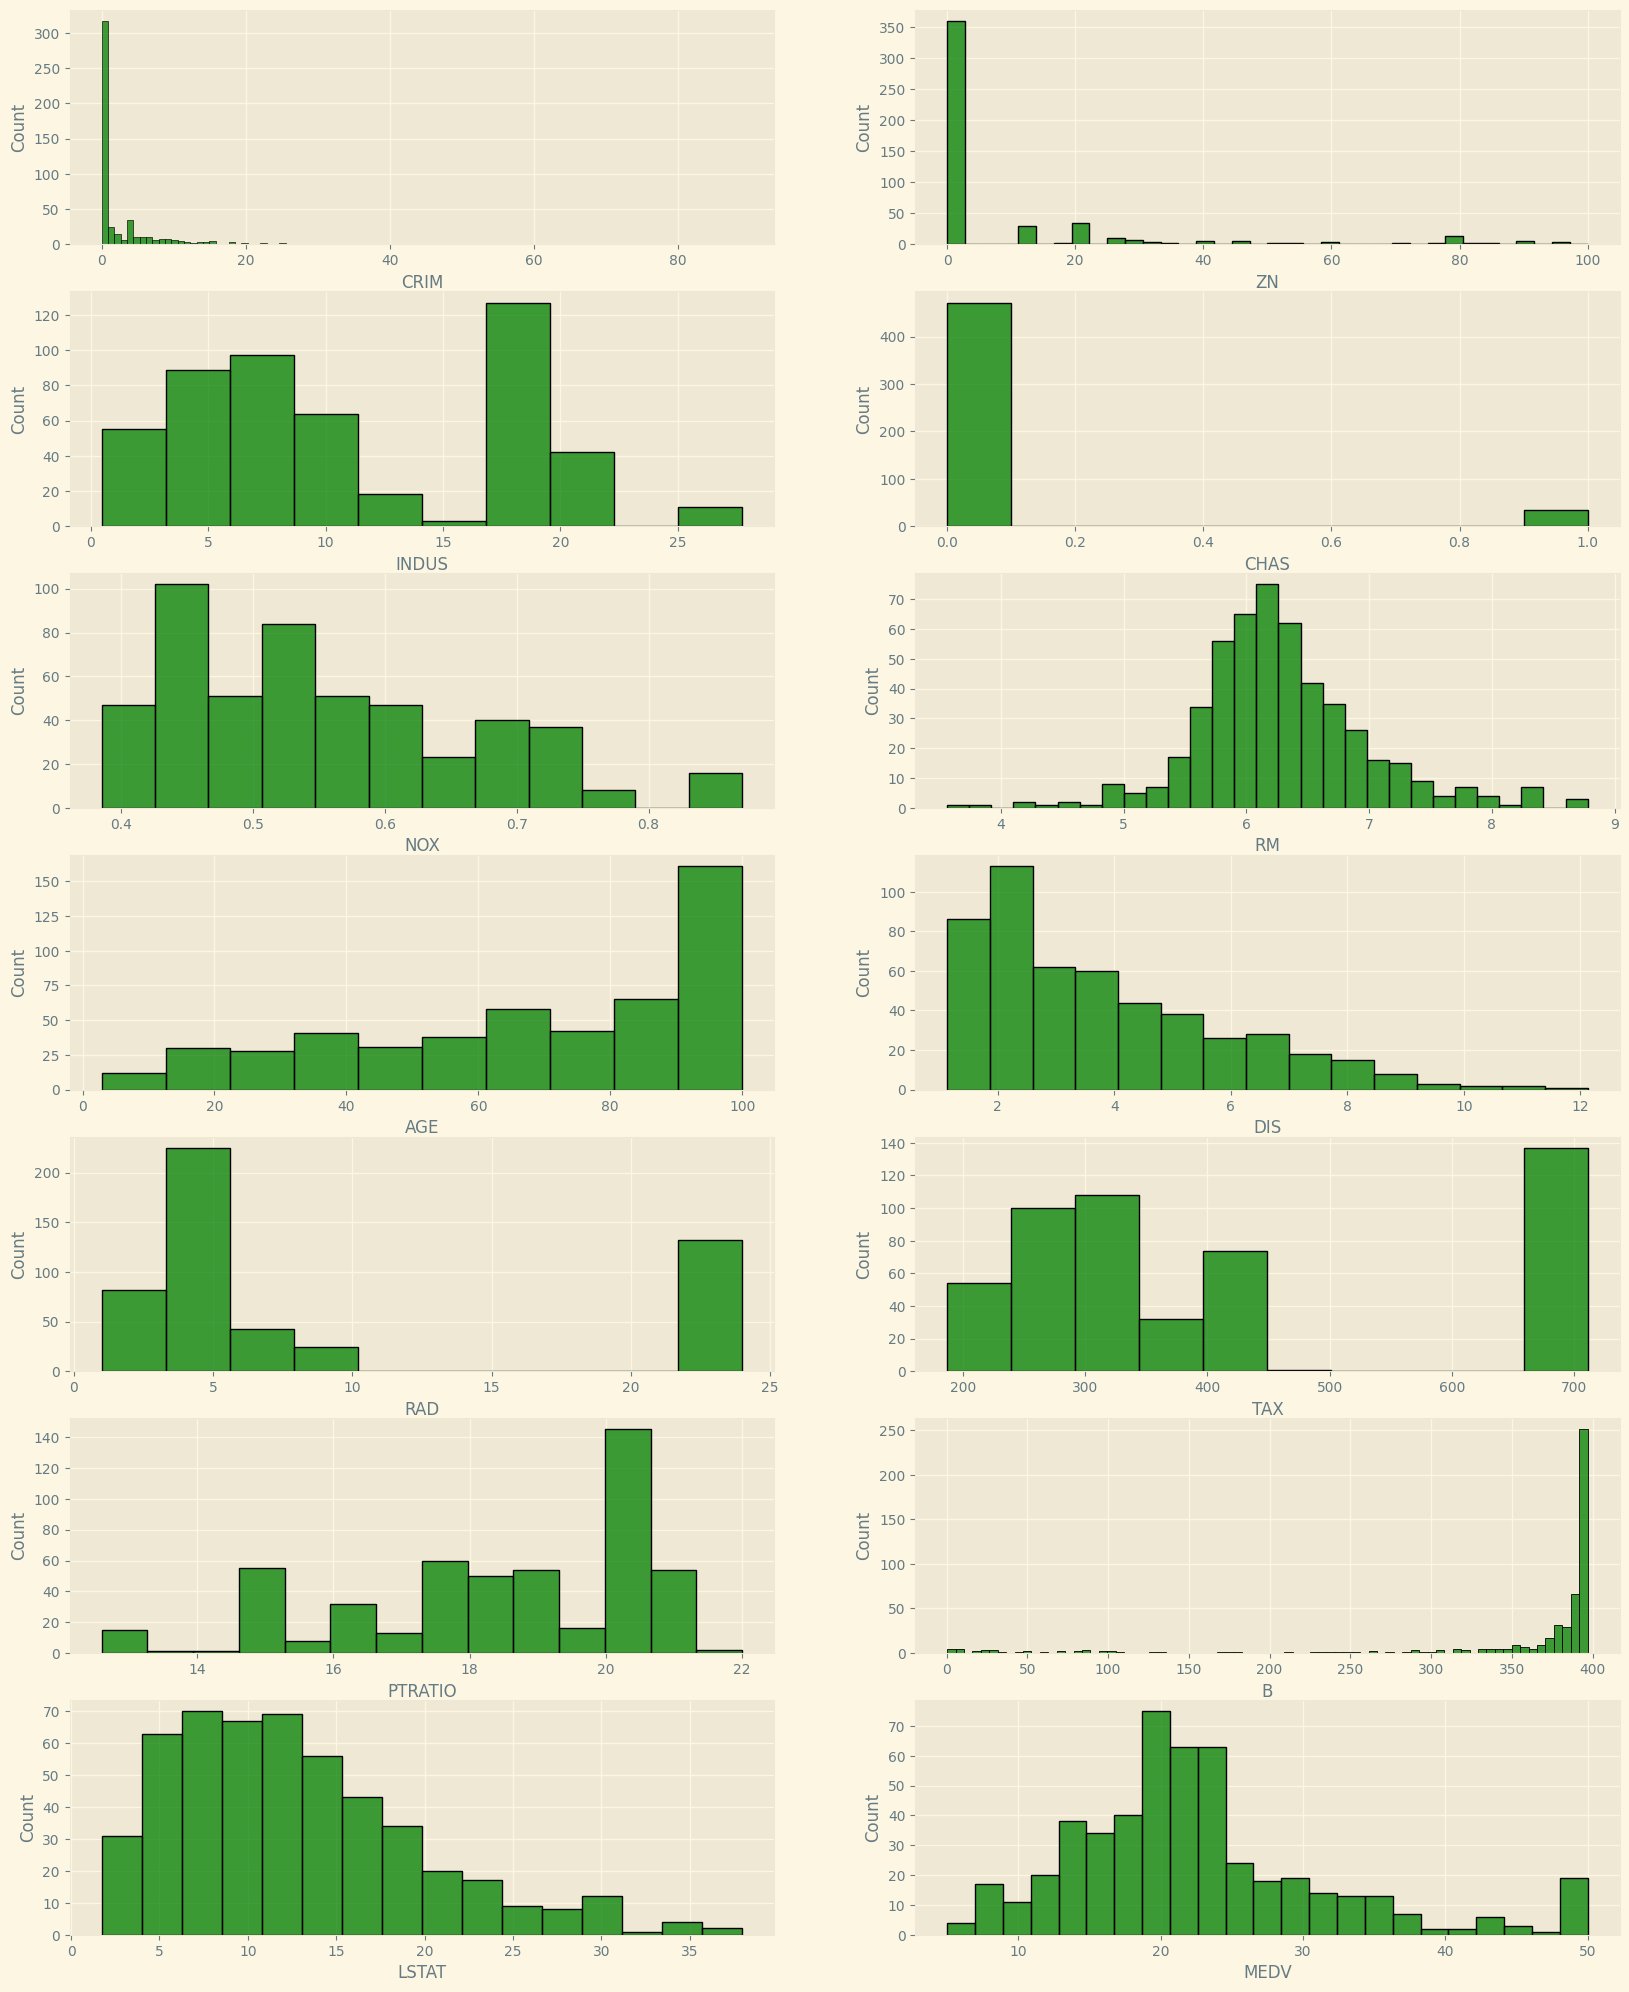

In [11]:
import seaborn as sns
fig, ax1 = plt.subplots(7,2, figsize=(20,25))
k = 0
columns = list(data.columns)
for i in range(7):
    for j in range(2):
            sns.histplot(data[columns[k]], ax = ax1[i][j], color = 'green')
            ax1[i][j].grid(True)
            k += 1
plt.show()

Clearly, most of the features are okay as far as building a model is concerned, only issue is the **DIS** feature which is very much skewed to the left. We will need to do something about that.
All we need to do is take a log transform of the columns and use it as shown below.

C:\Users\rujus\AppData\Local\Temp\ipykernel_4256\2805256723.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return np.log(col[0])
C:\Users\rujus\AppData\Local\Temp\ipykernel_4256\2805256723.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["DIS"], color = 'green')


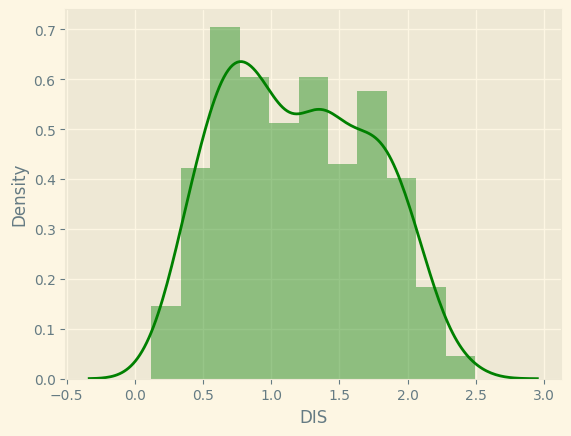

In [12]:
def log_transform(col):
    return np.log(col[0])

data["DIS"]=data[["DIS"]].apply(log_transform, axis=1)
#Plot
sns.distplot(data["DIS"], color = 'green')
plt.grid(True)
plt.show()

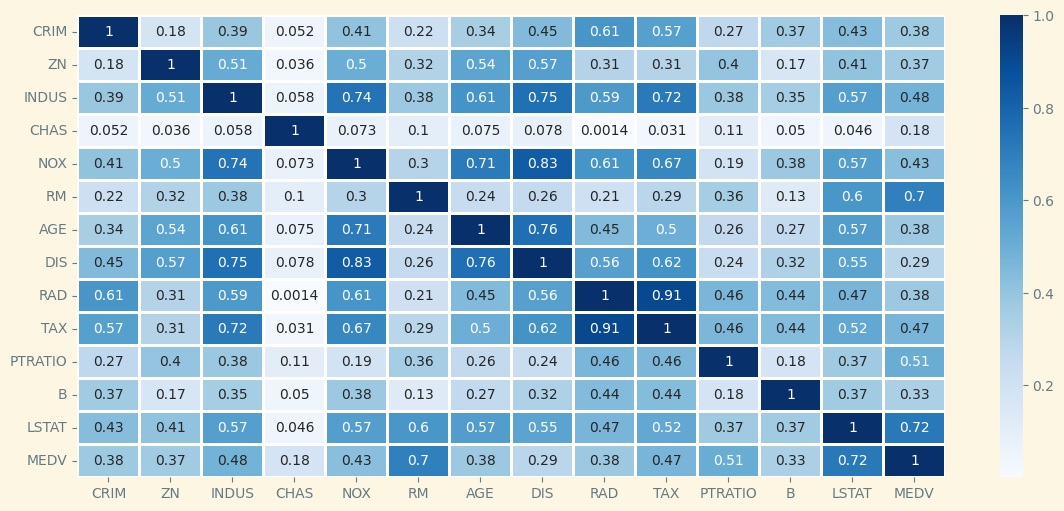

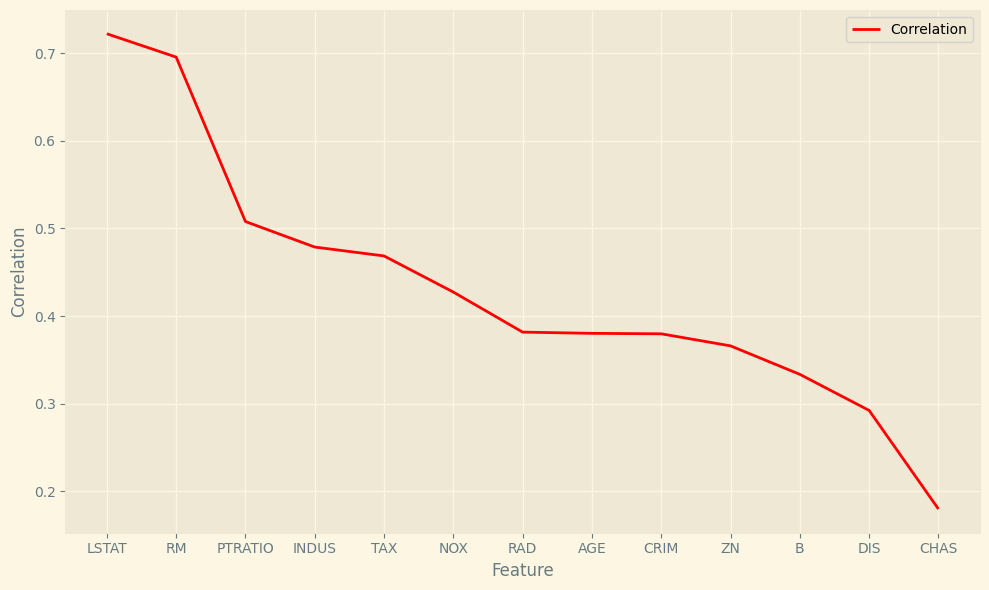

In [13]:
plt.figure(figsize=(14,6))
corr=abs(data.corr())
sns.heatmap(corr,annot=True,linewidth=1,cmap="Blues")
plt.show()

plt.figure(figsize=(10,6))
plt.plot(corr["MEDV"].sort_values(ascending=False)[1:],label="Correlation",color="red")
plt.ylabel("Correlation")
plt.xlabel("Feature")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

Observing the correlation coefficients, we note that features such as LSTAT (0.72), RM (0.7), PTRATIO (0.51), INDUS (0.48), and TAX (0.47) exhibit the strongest correlations with the median value of houses. Subsequently, we will generate regression plots for these features utilizing the seaborn visualization library. This visual exploration aims to discern the nature of the correlation, whether it is positive or negative, with the output variable.

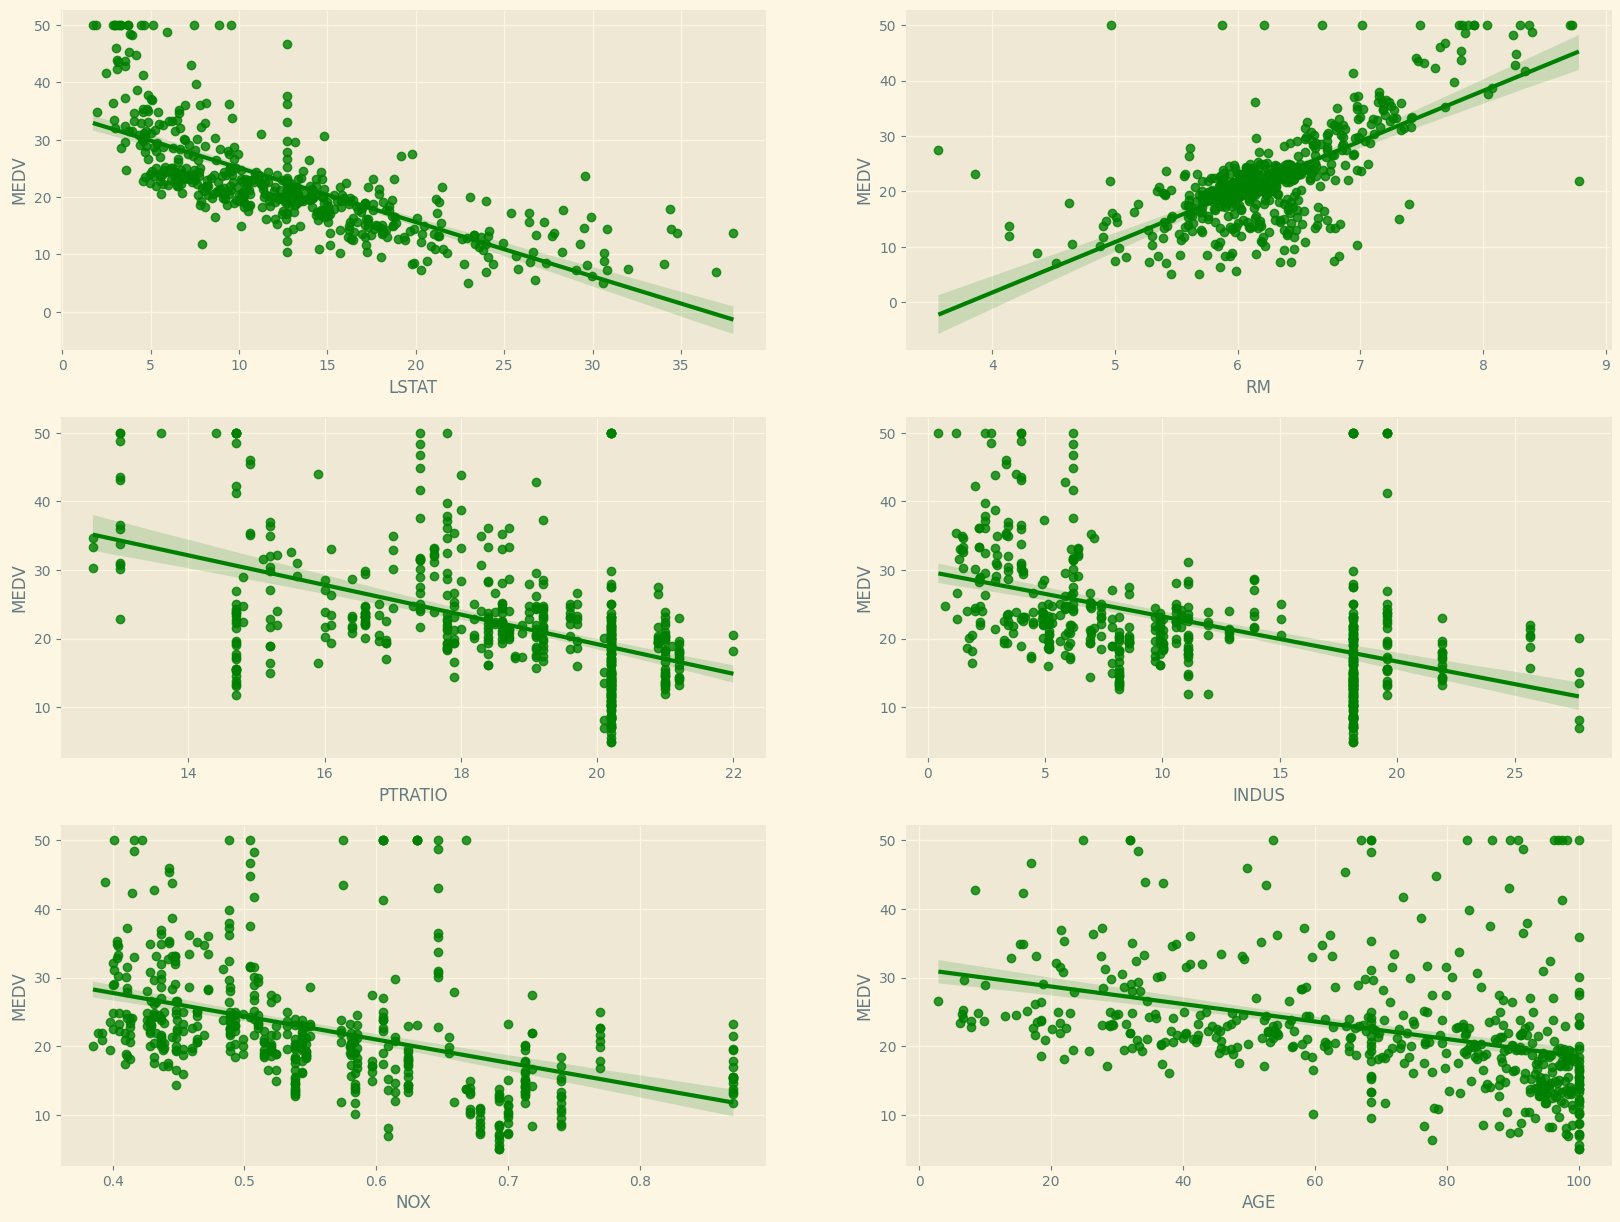

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax1 = plt.subplots(3, 2, figsize=(20, 15))
k = 0
columns = ["LSTAT", "RM", "PTRATIO", "INDUS", "NOX", "AGE"]

for i in range(3):
    for j in range(2):
        sns.regplot(x=columns[k], y="MEDV", data=data, ax=ax1[i][j], color="green")
        ax1[i][j].grid(True)
        k += 1

plt.show()


So, as we can see from the regression plots that  only **RM** has a positive correlation with **MEDV** rest all has negative correlation with the independent variable. In the further steps we would detect outliers if there are any present.

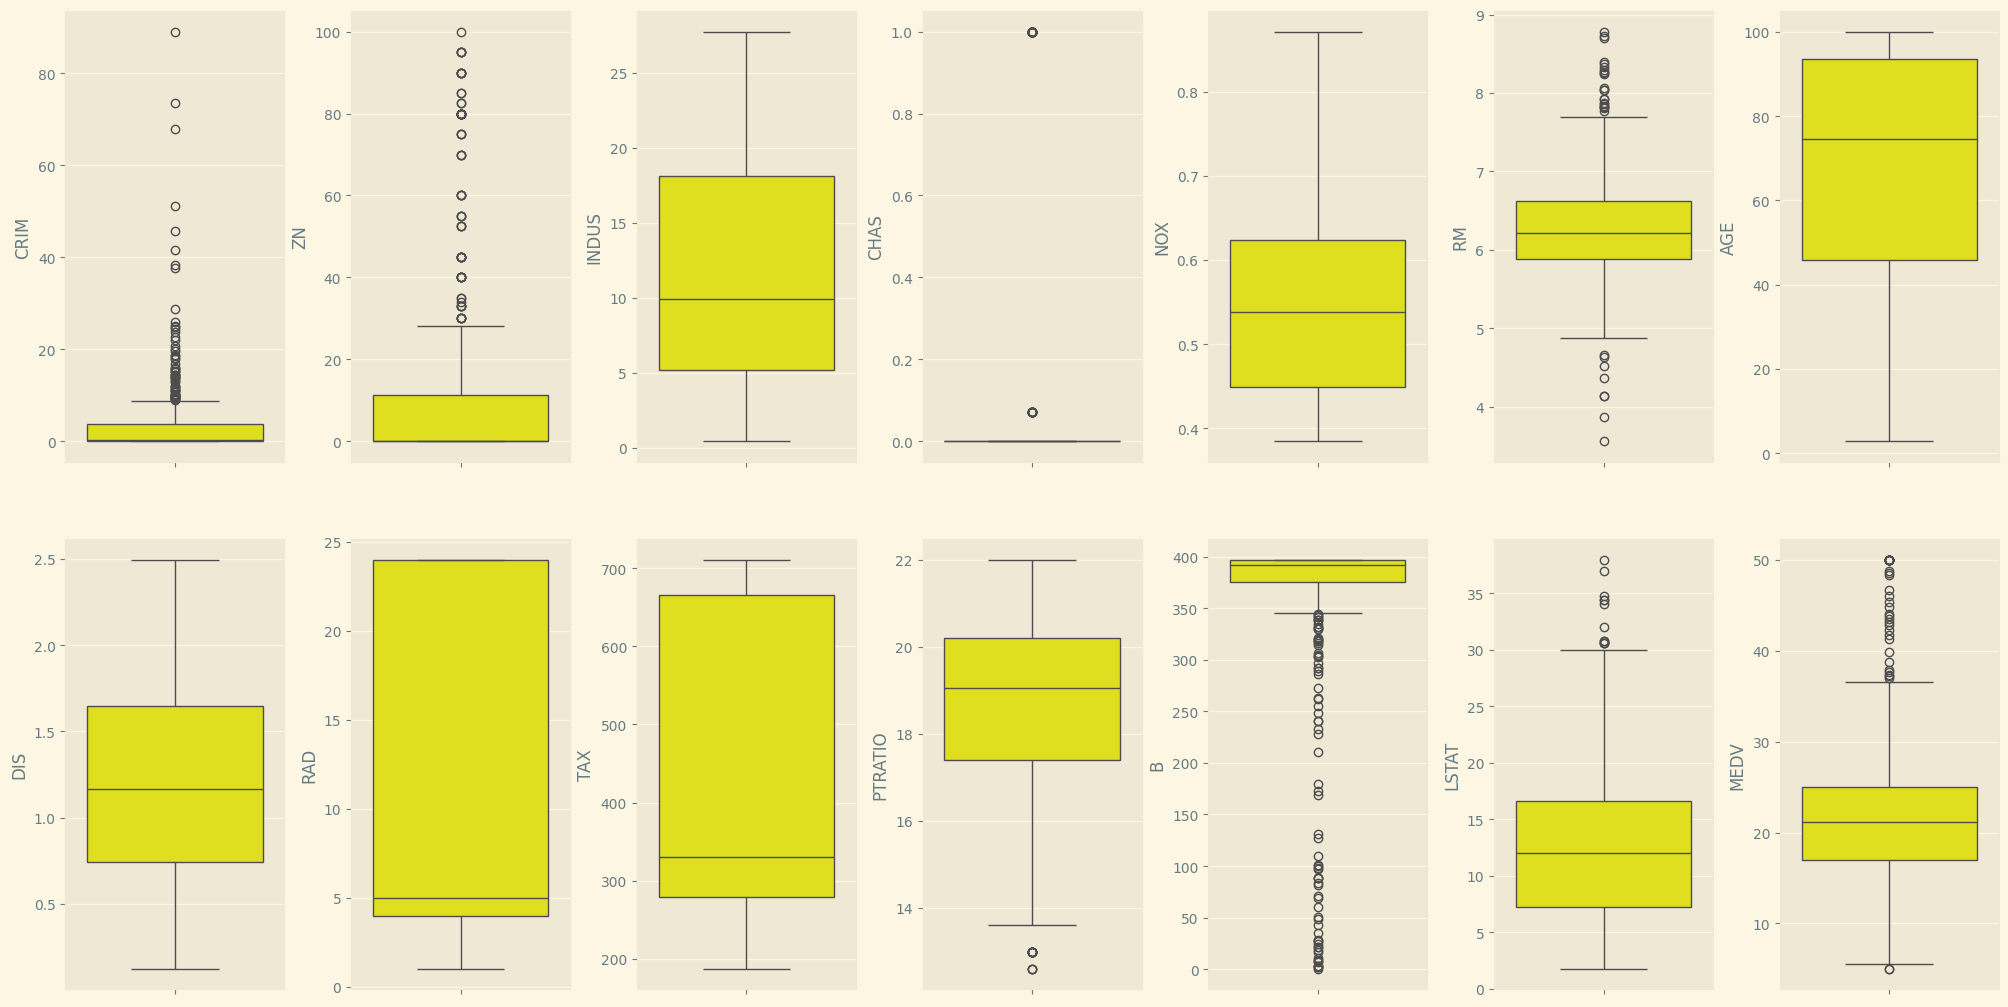

Column CRIM outliers = 12.65%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.00%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 2.37%
Column MEDV outliers = 7.91%


In [20]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.boxplot(y=k, data=data, ax=axs[index],color="yellow")
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

for k, v in data.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

### Feature Scaling Overview

- **Definition:**
  - Feature Scaling is a preprocessing technique aimed at standardizing independent features within a dataset to a consistent range.
  - It is particularly useful for handling varying magnitudes, values, or units in the features.

- **Importance:**
  - Without feature scaling, machine learning algorithms may assign disproportionate weight to higher magnitude values, potentially neglecting smaller ones.

- **Data Characteristics:**
  - Our dataset exhibits numerous outliers in almost all features, making it crucial to address these variations.

- **Technique Used:**
  - We opt for feature scaling, specifically utilizing the standardization technique.

- **Standardization:**
  - Involves transforming feature values to achieve a distribution with a mean of 0 and a variance of 1.
  - Ensures that all features contribute equally to the model, preventing the algorithm from being influenced by the scale of the values.

- **Tool Utilized:**
  - We employ the StandardScaler tool from the preprocessing library in Scikit-learn.

- **Data Split:**
  - The dataset is split into two parts:
    - **X:** Encompasses all input features for training the model.
    - **Y:** Represents the output feature (Median Value of Boston Houses).

- **Implementation:**
  - Feature scaling is performed using StandardScaler before feeding the data into our model.

In [23]:
from sklearn.preprocessing import StandardScaler

X=data.iloc[:,0:13]
Y=data.iloc[:,13]

print("Unscaled Data: \n")
display(X)  #Unscaled data
scaler = StandardScaler()
X = scaler.fit_transform(X)
print("Scaled Data: \n")
display(X)  #Scaled input data

Unscaled Data: 



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.200000,1.408545,1,296,15.3,396.90,4.980000
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900000,1.602836,2,242,17.8,396.90,9.140000
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.100000,1.602836,2,242,17.8,392.83,4.030000
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.800000,1.802073,3,222,18.7,394.63,2.940000
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200000,1.802073,3,222,18.7,396.90,12.715432
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.100000,0.907694,1,273,21.0,391.99,12.715432
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.700000,0.827460,1,273,21.0,396.90,9.080000
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.000000,0.773574,1,273,21.0,396.90,5.640000
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.300000,0.870833,1,273,21.0,393.45,6.480000


Scaled Data: 



array([[-0.42232846,  0.29644292, -1.31101039, ..., -1.45900038,
         0.44105193, -1.10414593],
       [-0.41986984, -0.48963852, -0.5997709 , ..., -0.30309415,
         0.44105193, -0.51035272],
       [-0.41987219, -0.48963852, -0.5997709 , ..., -0.30309415,
         0.39642699, -1.23974774],
       ...,
       [-0.41595175, -0.48963852,  0.1264106 , ...,  1.17646583,
         0.44105193, -1.00993835],
       [-0.41023216, -0.48963852,  0.1264106 , ...,  1.17646583,
         0.4032249 , -0.8900378 ],
       [-0.41751548, -0.48963852,  0.1264106 , ...,  1.17646583,
         0.44105193, -0.69020355]])

### Modelling
#### 1. XGBoost


**Overview:**
XGBoost (eXtreme Gradient Boosting) stands as a decision-tree-based ensemble Machine Learning algorithm, leveraging a gradient boosting framework. Widely recognized as a top performer for small-to-medium structured/tabular data, decision tree-based algorithms are currently at the forefront. Originating as a research project in 2014, XGBoost has rapidly emerged as one of the most popular Machine Learning algorithms in recent years.

**Key Features:**
- XGBoost is not just an algorithm; it's a comprehensive open-source library, strategically developed for an optimized implementation of the Gradient Boosting framework.
- Emphasizes speed, flexibility, and model performance, drawing strength not only from the algorithm but also from extensive underlying system optimization.

**Boosting Explained:**
- Boosting operates as a method within ensemble learning, following a sequential order.
- It combines decisions from multiple underlying models, utilizing a voting technique to determine the final prediction.
- In boosting, models are trained sequentially, with each new model aiming to correct the errors of its predecessors.
- Weight adjustments are made at each iteration, giving lower weight to correctly predicted outcomes and higher weight to incorrectly predicted ones.
- A weighted average is then used to generate the final outcome.

**Gradient Boosting Overview:**
- Gradient Boosting, a subset of boosting, employs a gradient descent algorithm to minimize errors.
- Gradient descent, an iterative optimization algorithm, is used to minimize a loss function, quantifying the disparity between predictions and actual results for each data point.
- The lower the output of the loss function, the better the predictions.
- XGBoost, as a powerful algorithm, represents an optimized implementation of the Gradi

Now the very main part, as we have prepocessed the data to some extent and also understood a little about XGBoost, we will build our XGBoost model.

We will split the data into training and testing parts using train_test_split by scikit-learn and use it in our modelrall model performance.

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [27]:
# Spliting the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=94)

In [30]:
!pip install xgboost

   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/99.8 MB 544.7 kB/s eta 0:03:04
   ---------------------------------------- 0.2/99.8 MB 1.3 MB/s eta 0:01:16
    --------------------------------------- 1.8/99.8 MB 8.1 MB/s eta 0:00:13
   - -------------------------------------- 4.1/99.8 MB 15.2 MB/s eta 0:00:07
   -- ------------------------------------- 6.6/99.8 MB 21.0 MB/s eta 0:00:05
   --- ------------------------------------ 9.2/99.8 MB 25.6 MB/s eta 0:00:04
   ---- ----------------------------------- 11.7/99.8 MB 54.4 MB/s eta 0:00:02
   ----- ---------------------------------- 14.2/99.8 MB 54.7 MB/s eta 0:00:02
   ------ --------------------------------- 15.7/99.8 MB 54.4 MB/s eta 0:00:02
   ------ --------------------------------- 15.7/99.8 MB 54.4 MB/s eta 0:00:02
   ----

In [31]:
import xgboost as xgb
xgbr = xgb.XGBRegressor(objective='reg:squarederror',
                        random_state=50,
                        max_depth=6,
                        learning_rate = 0.08,
                        n_estimators = 500,
                        colsample_bylevel = 0.4,
                        reg_alpha = 1,
                        subsample = 1,
                       )

xgbr.fit(X_train,Y_train)
Y_pred = xgbr.predict(X_test)
mse=mean_squared_error(Y_test, Y_pred)
score=r2_score(Y_test,Y_pred)
print("Root Mean Square Error: %.2f" % (mse**(0.5)))
print("Accuracy: {} %".format(round((score*100),2)))

Root Mean Square Error: 2.56
Accuracy: 92.66 %


#### New data Prediction

In [38]:
data.iloc[0,:].values.reshape(1, -1)

array([[6.32000000e-03, 1.80000000e+01, 2.31000000e+00, 0.00000000e+00,
        5.38000000e-01, 6.57500000e+00, 6.52000000e+01, 1.40854497e+00,
        1.00000000e+00, 2.96000000e+02, 1.53000000e+01, 3.96900000e+02,
        4.98000000e+00, 2.40000000e+01]])

In [41]:
scaler.transform(data.iloc[0,0:13].values.reshape(1, -1))

array([[-0.42232846,  0.29644292, -1.31101039, -0.27985132, -0.14421743,
         0.41367189, -0.1210593 ,  0.40910428, -0.98284286, -0.66660821,
        -1.45900038,  0.44105193, -1.10414593]])

In [45]:
xgbr.predict(scaler.transform(data.iloc[0,0:13].values.reshape(1, -1)))

array([24.037119], dtype=float32)

#### Pickling The Model file For Deployment

In [48]:
import pickle

In [49]:
pickle.dump(xgbr,open('xgboostmodel.pkl','wb'))

In [51]:
pickled_model=pickle.load(open('xgboostmodel.pkl','rb'))

In [52]:
## Prediction
pickled_model.predict(scaler.transform(data.iloc[0,0:13].values.reshape(1, -1)))

array([24.037119], dtype=float32)

#### 2. SVR
**Support Vector Regression (SVR)** is a machine learning algorithm used for regression tasks. It is a member of the Support Vector Machine (SVM) family, designed to predict continuous target variables.

**Key Concepts:**

**Kernel Trick:**
SVR employs the kernel trick to transform input features into a higher-dimensional space, allowing it to capture complex relationships.

**Hyperplane:**
The algorithm seeks to find a hyperplane that best fits the data, influenced by support vectors, crucial data points defining the hyperplane.

**Loss Function:**
SVR minimizes a loss function that penalizes errors based on a specified loss or cost function. Epsilon (ϵ) introduces a tolerance margin.

**Advantages:**

- **Non-Linearity:**
  SVR excels at capturing non-linear relationships through various kernel functions.

- **Robust to Outliers:**
  SVR is robust to outliers, focusing on the overall trend in the data.

**Disadvantages:**

- **Computational Complexity:**
  SVR can be computationally expensive, particularly for large datasets.

- **Model Interpretability:**
  The resulting hyperplane may be complex, making interpretation more challenging.

**Use Case:**
SVR is suitable when dealing with non-linear and complex relationships between input features and the target variable.


In [66]:
# Train an SVR model
svr_model = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = svr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f'Root Mean Squared Error: {mse**(0.5):.2f}')
print(f'Accuracy: {r2*100:.2f}%')

Root Mean Squared Error: 3.74
Accuracy: 84.37%


As you can seee that the accuracy of SVM is not as good as XgBoost so we would be moving forward with the previous algorithm itself

#### Elastic Net Regression

*Overview:*

Elastic Net is a linear regression model that combines both L1 (Lasso) and L2 (Ridge) regularization techniques. It is particularly useful when dealing with datasets containing numerous features, some of which may be correlated.

**Key Concepts:**

- **L1 Regularization (Lasso):**
  L1 regularization encourages sparsity in the model by penalizing the absolute values of the coefficients. This leads to automatic feature selection.

- **L2 Regularization (Ridge):**
  L2 regularization controls the magnitude of coefficients, preventing them from becoming too large. It is effective in handling multicollinearity.

- **Combined Penalty Term:**
  Elastic Net combines both L1 and L2 regularization penalties in a linear regression model, providing a balanced approach to feature selection and handling correlated features.

**Advantages:**

- **Feature Selection:**
  Elastic Net automatically performs feature selection by shrinking some coefficients to zero, resulting in a sparse model.

- **Robust to Multicollinearity:**
  The L2 regularization component helps Elastic Net handle multicollinearity, making it suitable for datasets with correlated features.

**Disadvantages:**

- **Model Complexity:**
  Elastic Net may still produce a complex model, especially when dealing with a large number of features.

**Use Case:**

Elastic Net is suitable for datasets with high dimensionality, containing numerous features with potential correlations. It offers a solution for regression tasks while considering feature selection and regularization.


In [75]:
from sklearn.linear_model import ElasticNet

# Train an Elastic Net model
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.1)  # Adjust alpha and l1_ratio as needed
elastic_net.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = elastic_net.predict(X_test)

# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f'Root Mean Squared Error: {mse**(0.5):.2f}')
print(f'Accuracy: {r2*100:.2f}%')

Root Mean Squared Error: 4.28
Accuracy: 79.46%


#### Multilayer Perceptron (MLP)

**Multilayer Perceptron (MLP)** is a powerful artificial neural network widely used in deep learning. It consists of layers of interconnected nodes, including an input layer, hidden layers, and an output layer. Each node employs an activation function, introducing non-linearity into the model. MLP excels at learning complex relationships in data and is applied to diverse machine learning tasks, such as classification and regression.

- **Neural Network Structure:**
  - Input Layer, Hidden Layers, Output Layer
  - Interconnected nodes with weighted connections

- **Activation Function:**
  - Sigmoid, Hyperbolic Tangent (tanh), Rectified Linear Unit (ReLU)

- **Feedforward Architecture:**
  - Processes input data in a forward direction for predictions

- **Backpropagation:**
  - Adjusts weights based on prediction errors to minimize a loss function

**Advantages:**
- Non-Linearity
- Versatility
- Representation Learning

**Challenges:**
- Computational Intensity
- Overfitting
- Hyperparameter Tuning

**Use Cases:**
- Image Classification
- Speech Recognition
- Financial Forecasting

*Note: MLP's success depends on careful design and tuning to match the characteristics of the data.*

In [77]:
from sklearn.neural_network import MLPRegressor
results = {}

mlp_regressor = MLPRegressor()
mlp_regressor.fit(X_train, Y_train)
y_pred_mlp = mlp_regressor.predict(X_test)
mse_mlp = mean_squared_error(Y_test, y_pred_mlp)
r2_mlp = r2_score(Y_test, y_pred_mlp)
results['MLP Regressor'] = {'MSE': mse_mlp, 'R2': r2_mlp}

In [78]:
results

{'MLP Regressor': {'MSE': 20.16757988295946, 'R2': 0.7740787514368186}}

#### Random Forest Algorithm 

**Random Forest** is an ensemble learning algorithm based on decision trees. It constructs multiple trees by using bagging (bootstrap aggregating) and introduces randomness by considering random subsets of features at each node. For classification, it outputs the mode of class predictions, and for regression, it provides the mean prediction.

**Advantages:**
- High Accuracy
- Robust to Outliers
- Feature Importance Analysis

**Challenges:**
- Reduced Interpretability
- Computational Complexity

**Use Cases:**
- Classification (e.g., image recognition)
- Regression (e.g., house price prediction)
- Feature Importance Analysis

*Note: Random Forest is favored for its versatility and robustness in handling complex datasets.*

In [80]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, Y_train)
y_pred_rf = rf_regressor.predict(X_test)
mse_rf = mean_squared_error(Y_test, y_pred_rf)
r2_rf = r2_score(Y_test, y_pred_rf)
results['Random Forest'] = {'MSE': mse_rf, 'R2': r2_rf}

In [81]:
results

{'MLP Regressor': {'MSE': 20.16757988295946, 'R2': 0.7740787514368186},
 'Random Forest': {'MSE': 10.41167054901962, 'R2': 0.8833663918172692}}

#### k-Nearest Neighbors (KNN) 

**k-Nearest Neighbors (KNN)** is a versatile algorithm used for classification and regression tasks. It predicts based on the majority class (classification) or average value (regression) of its k nearest neighbors.

**Advantages:**
- Simplicity
- Adaptability
- No Training Phase

**Challenges:**
- Computational Intensity
- Sensitivity to Outliers

**Use Cases:**
- Classification (e.g., image recognition)
- Regression (e.g., numerical predictions)
- Anomaly Detection

*Note: KNN is straightforward, adapts to complex decision boundaries, and is suitable for scenarios valuing simplicity and interpretability.*

In [84]:
from sklearn.neighbors import KNeighborsRegressor

knn_regressor = KNeighborsRegressor()
knn_regressor.fit(X_train, Y_train)
y_pred_knn = knn_regressor.predict(X_test)
mse_knn = mean_squared_error(Y_test, y_pred_knn)
r2_knn = r2_score(Y_test, y_pred_knn)
results['K-Nearest Neighbors'] = {'MSE': mse_knn, 'R2': r2_knn}

In [85]:
results

{'MLP Regressor': {'MSE': 20.16757988295946, 'R2': 0.7740787514368186},
 'Random Forest': {'MSE': 10.41167054901962, 'R2': 0.8833663918172692},
 'K-Nearest Neighbors': {'MSE': 21.04637647058824, 'R2': 0.7642342969478637}}

## Gradient Boosting - Brief Overview

**Gradient Boosting** is an ensemble learning technique that builds a series of weak learners (typically decision trees) sequentially. It corrects errors made by previous models by giving more weight to misclassified data points. The final prediction is a weighted sum of individual learner predictions.

**Key Concepts:**
- **Sequential Learning:**
  - Models are trained sequentially, with each new model focusing on correcting the errors of the previous ones.

- **Gradient Descent:**
  - Gradient boosting minimizes a loss function using gradient descent, adjusting model parameters to reduce prediction errors.

- **Weak Learners:**
  - Typically, decision trees with limited depth are used as weak learners, known as "stumps."

**Advantages:**
- **High Predictive Accuracy:**
  - Gradient boosting often achieves high accuracy and outperforms other algorithms.

- **Handles Complex Relationships:**
  - Capable of capturing complex non-linear relationships in data.

- **Feature Importance:**
  - Provides insights into feature importance, aiding in feature selection.

**Challenges:**
- **Computational Intensity:**
  - Training multiple trees sequentially can be computationally expensive.

- **Overfitting:**
  - Without proper tuning, gradient boosting can be prone to overfitting.

**Use Cases:**
- **Classification:**
  - Effective for tasks like spam detection, fraud detection, etc.

- **Regression:**
  - Useful for predicting numerical values with high accuracy.

*Note: Gradient boosting is a powerful technique often used in competitions and scenarios where predictive accuracy is critical.*

In [86]:
from sklearn.linear_model import Ridge, Lasso

gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(X_train, Y_train)
y_pred_gb = gb_regressor.predict(X_test)
mse_gb = mean_squared_error(Y_test, y_pred_gb)
r2_gb = r2_score(Y_test, y_pred_gb)
results['Gradient Boosting'] = {'MSE': mse_gb, 'R2': r2_gb}

In [87]:
results

{'MLP Regressor': {'MSE': 20.16757988295946, 'R2': 0.7740787514368186},
 'Random Forest': {'MSE': 10.41167054901962, 'R2': 0.8833663918172692},
 'K-Nearest Neighbors': {'MSE': 21.04637647058824, 'R2': 0.7642342969478637},
 'Gradient Boosting': {'MSE': 8.93363572865744, 'R2': 0.8999236323971479}}

## Ridge and Lasso Regression - Brief Overview

**Ridge Regression** and **Lasso Regression** are regularization techniques used in linear regression to prevent overfitting by adding a penalty term to the cost function.

### Ridge Regression:

- **Objective:**
  - Minimizes the sum of squared residuals along with a penalty term, which is the squared sum of the coefficients multiplied by a regularization parameter (alpha).

- **Advantages:**
  - Handles multicollinearity well.
  - Stabilizes model coefficients.

- **Use Cases:**
  - Suitable when there is a possibility of multicollinearity among predictor variables.

### Lasso Regression:

- **Objective:**
  - Similar to Ridge, but the penalty term is the absolute sum of the coefficients multiplied by a regularization parameter (alpha).

- **Advantages:**
  - Performs variable selection by pushing coefficients to exactly zero.
  - Useful for sparse feature sets.

- **Use Cases:**
  - Effective when dealing with datasets with many features, where some features are expected to have little impact.

### Common Aspects:

- **Regularization Parameter (alpha):**
  - Controls the strength of the penalty. Higher alpha values result in more regularization.

- **Shrinkage:**
  - Both methods introduce shrinkage, reducing the impact of less influential features.

- **Loss Function:**
  - The objective includes both the traditional sum of squared residuals and the penalty term.

*Note: Ridge and Lasso Regression are valuable tools for improving the generalization performance of linear regression models, especially in the presence of multicollinearity or when dealing with high-dimensional datasets.*

In [88]:
# Ridge Regression
ridge_regressor = Ridge()
ridge_regressor.fit(X_train, Y_train)
y_pred_ridge = ridge_regressor.predict(X_test)
mse_ridge = mean_squared_error(Y_test, y_pred_ridge)
r2_ridge = r2_score(Y_test, y_pred_ridge)
results['Ridge Regression'] = {'MSE': mse_ridge, 'R2': r2_ridge}

# Lasso Regression
lasso_regressor = Lasso()
lasso_regressor.fit(X_train, Y_train)
y_pred_lasso = lasso_regressor.predict(X_test)
mse_lasso = mean_squared_error(Y_test, y_pred_lasso)
r2_lasso = r2_score(Y_test, y_pred_lasso)
results['Lasso Regression'] = {'MSE': mse_lasso, 'R2': r2_lasso}

In [89]:
# Printing the final results
results

{'MLP Regressor': {'MSE': 20.16757988295946, 'R2': 0.7740787514368186},
 'Random Forest': {'MSE': 10.41167054901962, 'R2': 0.8833663918172692},
 'K-Nearest Neighbors': {'MSE': 21.04637647058824, 'R2': 0.7642342969478637},
 'Gradient Boosting': {'MSE': 8.93363572865744, 'R2': 0.8999236323971479},
 'Ridge Regression': {'MSE': 18.47571723179802, 'R2': 0.793031333985941},
 'Lasso Regression': {'MSE': 22.60166921967234, 'R2': 0.7468115976555587}}

So, as you can see the best algorithm performed is XgBoost so moving forward with it